In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def plot_feature_importance(importance, names, result_only = False, topn = 'all'):
    feature_importance = np.array(importance)
    feature_name = np.array(names)

    data={'feature_name':feature_name,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    #변수의 특성 중요도 순으로 정렬하기
    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    #변수의 특성 중요도 그래프로 그리기
    if result_only == False :
        plt.figure(figsize=(10,20))
        sns.barplot(x='feature_importance', y='feature_name', data = fi_df)

        plt.xlabel('importance')
        plt.ylabel('feature name')
        plt.grid()

    return fi_df

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv("/content/drive/MyDrive/5_mini/train_dataset.csv")
data

,tBodyAcc-mean()-Z,"tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-Y,1",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,"tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,3",...,fBodyGyro-min()-Y,"fBodyGyro-bandsEnergy()-49,64.1",fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyGyroMag-mean(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-meanFreq(),"angle(tBodyAccMean,gravity)",Activity,Activity_dynamic
0,-0.103362,-0.094784,-0.109208,0.068584,-0.014314,0.198600,-0.073666,0.113098,-0.058315,0.354270,...,-0.996607,-0.999969,-0.985141,-1.000000,-0.975435,-0.993965,-0.032207,-0.042494,STANDING,4
1,-0.098163,-0.052478,0.464764,0.075947,0.004456,0.130310,0.401913,0.512569,0.011987,0.503466,...,-0.992681,-0.999941,-0.988982,-1.000000,-0.978534,-0.994733,-0.246705,-0.062899,LAYING,3
2,-0.108717,-0.226718,0.301165,0.079530,0.014504,0.111340,0.263556,0.562730,0.314589,0.132061,...,-0.999971,-0.999976,-0.991535,-1.000000,-0.991953,-0.992200,0.388765,0.000265,STANDING,4
3,-0.150354,0.549363,-0.384117,-0.309509,-0.201293,0.411714,-0.372620,0.288349,-0.259441,-0.711894,...,-0.876509,-0.969331,-0.387366,0.323260,-0.479590,-0.889227,0.050888,-0.255125,WALKING,0
4,0.091229,-0.091537,-0.610793,0.584212,-0.266815,-0.248696,-0.628852,0.095282,-0.240501,-0.305964,...,-0.960097,-0.990292,-0.220963,0.446385,-0.433366,-0.810446,-0.013902,-0.044344,WALKING_DOWNSTAIRS,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,-0.131974,-0.059080,0.000441,0.082392,-0.008733,0.180157,0.041011,0.173103,-0.001160,0.419680,...,-0.997983,-0.999967,-0.987428,-1.000000,-0.981119,-0.983765,0.052914,-0.034888,SITTING,5
5877,-0.105174,0.275170,-0.191391,-0.108297,0.050577,0.168315,-0.313497,-0.067457,-0.006740,-0.260559,...,-0.951267,-0.982422,-0.561358,0.241367,-0.415217,-0.845447,0.325461,0.721718,WALKING_UPSTAIRS,1
5878,-0.107440,-0.025156,0.407618,0.070742,0.011347,0.222424,0.259452,0.497603,0.187073,0.155540,...,-0.998177,-0.999920,-0.989684,-1.000000,-0.991452,-0.989032,0.362439,0.060173,LAYING,3
5879,-0.121001,0.686123,-0.606018,-0.085843,-0.039197,0.499451,-0.628068,0.337687,-0.037529,-0.229386,...,-0.687973,-0.940509,-0.465531,0.323401,-0.504324,-0.867993,0.031915,0.260880,WALKING_UPSTAIRS,1


In [5]:
data = data.drop("Activity_dynamic",axis=1)

In [18]:
data

,tBodyAcc-mean()-Z,"tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-Y,1",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,"tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,3",...,"fBodyAccJerk-bandsEnergy()-49,64.2",fBodyGyro-min()-Y,"fBodyGyro-bandsEnergy()-49,64.1",fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyGyroMag-mean(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-meanFreq(),"angle(tBodyAccMean,gravity)",Activity_dynamic
0,-0.103362,-0.094784,-0.109208,0.068584,-0.014314,0.198600,-0.073666,0.113098,-0.058315,0.354270,...,-0.999719,-0.996607,-0.999969,-0.985141,-1.000000,-0.975435,-0.993965,-0.032207,-0.042494,4
1,-0.098163,-0.052478,0.464764,0.075947,0.004456,0.130310,0.401913,0.512569,0.011987,0.503466,...,-0.999583,-0.992681,-0.999941,-0.988982,-1.000000,-0.978534,-0.994733,-0.246705,-0.062899,3
2,-0.108717,-0.226718,0.301165,0.079530,0.014504,0.111340,0.263556,0.562730,0.314589,0.132061,...,-0.999278,-0.999971,-0.999976,-0.991535,-1.000000,-0.991953,-0.992200,0.388765,0.000265,4
3,-0.150354,0.549363,-0.384117,-0.309509,-0.201293,0.411714,-0.372620,0.288349,-0.259441,-0.711894,...,-0.847997,-0.876509,-0.969331,-0.387366,0.323260,-0.479590,-0.889227,0.050888,-0.255125,0
4,0.091229,-0.091537,-0.610793,0.584212,-0.266815,-0.248696,-0.628852,0.095282,-0.240501,-0.305964,...,-0.927245,-0.960097,-0.990292,-0.220963,0.446385,-0.433366,-0.810446,-0.013902,-0.044344,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,-0.131974,-0.059080,0.000441,0.082392,-0.008733,0.180157,0.041011,0.173103,-0.001160,0.419680,...,-0.998932,-0.997983,-0.999967,-0.987428,-1.000000,-0.981119,-0.983765,0.052914,-0.034888,5
5877,-0.105174,0.275170,-0.191391,-0.108297,0.050577,0.168315,-0.313497,-0.067457,-0.006740,-0.260559,...,-0.933058,-0.951267,-0.982422,-0.561358,0.241367,-0.415217,-0.845447,0.325461,0.721718,1
5878,-0.107440,-0.025156,0.407618,0.070742,0.011347,0.222424,0.259452,0.497603,0.187073,0.155540,...,-0.999818,-0.998177,-0.999920,-0.989684,-1.000000,-0.991452,-0.989032,0.362439,0.060173,3
5879,-0.121001,0.686123,-0.606018,-0.085843,-0.039197,0.499451,-0.628068,0.337687,-0.037529,-0.229386,...,-0.977266,-0.687973,-0.940509,-0.465531,0.323401,-0.504324,-0.867993,0.031915,0.260880,1


In [33]:
test = pd.read_csv("/content/drive/MyDrive/5_mini/test_dataset.csv")

In [6]:
x=data.drop("Activity_dynamic",axis=1)
y=data["Activity_dynamic"]

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_ = scaler.fit_transform(x)
test_ = scaler.transform(test)

In [16]:
data["Activity_dynamic"].value_counts()

3    1115
4    1087
5    1032
0     998
1     858
2     791
Name: Activity_dynamic, dtype: int64

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
model = RandomForestClassifier()
model.fit(x,y)

RandomForestClassifier()

,feature_name,feature_importance
0,tBodyGyroMag-energy(),0.055622
1,fBodyBodyAccJerkMag-entropy(),0.055207
2,"fBodyAccJerk-bandsEnergy()-25,48",0.049526
3,fBodyBodyAccJerkMag-iqr(),0.046337
4,"fBodyAccJerk-bandsEnergy()-49,64",0.037059
5,"fBodyAcc-bandsEnergy()-25,32",0.030674
6,tBodyAccJerkMag-min(),0.030069
7,fBodyBodyGyroMag-mean(),0.029301
8,"fBodyAccJerk-bandsEnergy()-49,64.1",0.026584
9,tBodyGyroJerk-max()-Y,0.025733


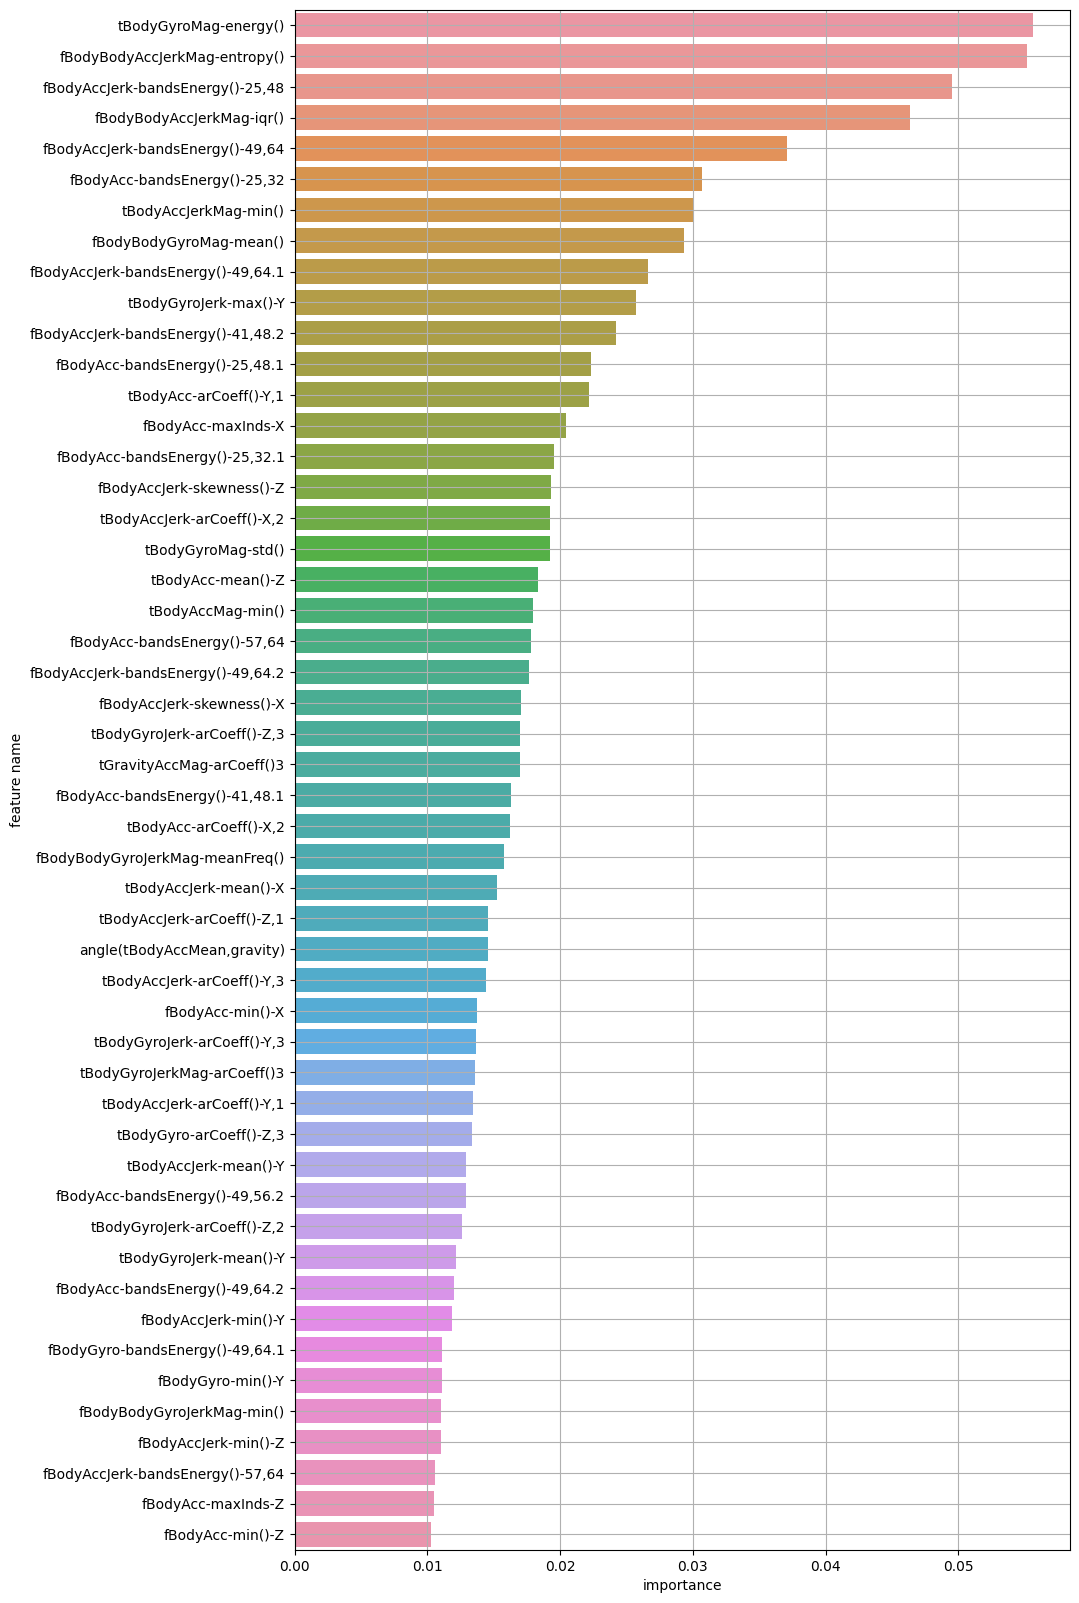

In [14]:
plot_feature_importance(model.feature_importances_,x.columns,result_only = False, topn ='all')

In [8]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pycaret-3.0.0-py3-none-any.whl (481 kB)
  Using cached sktime-0.17.1-py3-none-any.whl (16.1 MB)
  Using cached schemdraw-0.16-py3-none-any.whl (105 kB)
  Using cached tbats-1.1.2-py3-none-any.whl (43 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
  Using cached category_encoders-2.6.0-py2.py3-none-any.whl (81 kB)
  Using cached plotly_resampler-0.8.3.2.tar.gz (46 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached wurlitzer-3.0.3-py3-none-any.whl (7.3 kB)
  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl (79.9 MB)
  Using cached pyod-1.0.9.tar.gz (149 kB)
  Preparing metadata (setup.py) ... done
  Using cached xxhash-3.2.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (212 kB)
  Using cached pmdarima-2.0.3-cp39-cp39-manylinux_2_17

In [9]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached optuna-3.1.1-py3-none-any.whl (365 kB)
  Using cached alembic-1.10.3-py3-none-any.whl (212 kB)
  Using cached cmaes-0.9.1-py3-none-any.whl (21 kB)
  Using cached colorlog-6.7.0-py2.py3-none-any.whl (11 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.3 MB/s eta 0:00:00


In [10]:
!pip install pycaret[tuners]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tune_sklearn-0.4.5-py3-none-any.whl (41 kB)
  Using cached ray-2.3.1-cp39-cp39-manylinux2014_x86_64.whl (58.6 MB)
  Using cached scikit_optimize-0.9.0-py2.py3-none-any.whl (100 kB)
  Using cached frozenlist-1.3.3-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (158 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl (7.6 kB)
  Using cached virtualenv-20.21.0-py3-none-any.whl (8.7 MB)
  Using cached tensorboardX-2.6-py2.py3-none-any.whl (114 kB)
  Using cached pyaml-21.10.1-py2.py3-none-any.whl (24 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 23.3 MB/s eta 0:00:00


In [11]:
!pip uninstall packaging
!pip install packaging

Found existing installation: packaging 23.0
Uninstalling packaging-23.0:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/packaging-23.0.dist-info/*
    /usr/local/lib/python3.9/dist-packages/packaging/*
Proceed (Y/n)? y
  Successfully uninstalled packaging-23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 4.4 MB/s eta 0:00:00


In [17]:
from pycaret.classification import *
s = setup(data, target = 'Activity_dynamic', session_id = 42,fold=10,use_gpu=True)

,Description,Value
0,Session id,42
1,Target,Activity_dynamic
2,Target type,Multiclass
3,Original data shape,"(5881, 51)"
4,Transformed data shape,"(5881, 51)"
5,Transformed train set shape,"(4116, 51)"
6,Transformed test set shape,"(1765, 51)"
7,Numeric features,50
8,Preprocess,True
9,Imputation type,simple


In [19]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7495,0.9554,0.7495,0.7497,0.7480,0.6984,0.6990,4.6340
xgboost,Extreme Gradient Boosting,0.7451,0.9540,0.7451,0.7457,0.7440,0.6932,0.6938,1.6610
gbc,Gradient Boosting Classifier,0.7189,0.9468,0.7189,0.7192,0.7171,0.6616,0.6623,38.2450
et,Extra Trees Classifier,0.6992,0.9421,0.6992,0.6974,0.6945,0.6377,0.6393,1.4820
rf,Random Forest Classifier,0.6978,0.9403,0.6978,0.6961,0.6949,0.6361,0.6369,2.4780
lr,Logistic Regression,0.6735,0.9309,0.6735,0.6678,0.6676,0.6067,0.6080,2.5390
lda,Linear Discriminant Analysis,0.6628,0.9280,0.6628,0.6599,0.6586,0.5939,0.5949,0.3180
ridge,Ridge Classifier,0.6526,0.0000,0.6526,0.6458,0.6282,0.5810,0.5886,0.0930
svm,SVM - Linear Kernel,0.6295,0.0000,0.6295,0.6492,0.6042,0.5536,0.5653,0.2070
knn,K Neighbors Classifier,0.5938,0.8838,0.5938,0.5999,0.5848,0.5100,0.5132,0.3460


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [52]:
gbc = create_model('gbc',fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7039,0.9430,0.7039,0.7004,0.7010,0.6436,0.6441
1,0.7217,0.9467,0.7217,0.7244,0.7227,0.6651,0.6653
2,0.7315,0.9496,0.7315,0.7310,0.7307,0.6768,0.6770
3,0.7096,0.9429,0.7096,0.7137,0.7099,0.6506,0.6511
4,0.7157,0.9430,0.7157,0.7133,0.7142,0.6577,0.6578
Mean,0.7165,0.9450,0.7165,0.7165,0.7157,0.6588,0.6591
Std,0.0096,0.0027,0.0096,0.0105,0.0102,0.0115,0.0114


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [20]:
lgbm = create_model('lightgbm',fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7439,0.9504,0.7439,0.7413,0.7420,0.6918,0.6920
1,0.7521,0.9576,0.7521,0.7500,0.7505,0.7015,0.7018
2,0.7436,0.9583,0.7436,0.7450,0.7438,0.6913,0.6915
3,0.7145,0.9480,0.7145,0.7182,0.7149,0.6563,0.6568
4,0.7558,0.9524,0.7558,0.7514,0.7514,0.7058,0.7067
Mean,0.7420,0.9533,0.7420,0.7412,0.7405,0.6893,0.6898
Std,0.0145,0.0040,0.0145,0.0120,0.0133,0.0174,0.0175


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [21]:
xgb = create_model('xgboost',fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7221,0.9467,0.7221,0.7185,0.7182,0.6654,0.6663
1,0.7412,0.9546,0.7412,0.7397,0.7402,0.6884,0.6885
2,0.7424,0.9540,0.7424,0.7422,0.7421,0.6900,0.6901
3,0.7120,0.9474,0.7120,0.7155,0.7124,0.6534,0.6538
4,0.7558,0.9538,0.7558,0.7533,0.7536,0.7059,0.7063
Mean,0.7347,0.9513,0.7347,0.7338,0.7333,0.6806,0.6810
Std,0.0156,0.0035,0.0156,0.0145,0.0155,0.0187,0.0186


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [22]:
et = create_model('et',fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7172,0.9441,0.7172,0.7173,0.7125,0.6594,0.6614
1,0.6987,0.9394,0.6987,0.6968,0.6959,0.6373,0.6381
2,0.7096,0.9408,0.7096,0.7076,0.7054,0.6500,0.6513
3,0.6695,0.9381,0.6695,0.6674,0.6646,0.6017,0.6031
4,0.6950,0.9391,0.6950,0.6890,0.6886,0.6325,0.6339
Mean,0.6980,0.9403,0.6980,0.6956,0.6934,0.6362,0.6376
Std,0.0163,0.0021,0.0163,0.0170,0.0165,0.0197,0.0198


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [23]:
svm = create_model('svm',fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6566,0.0000,0.6566,0.6751,0.6559,0.5869,0.5900
1,0.6537,0.0000,0.6537,0.6791,0.6085,0.5812,0.5979
2,0.5820,0.0000,0.5820,0.6439,0.5247,0.4949,0.5313
3,0.6294,0.0000,0.6294,0.6242,0.5876,0.5520,0.5677
4,0.6063,0.0000,0.6063,0.7203,0.5871,0.5282,0.5641
Mean,0.6256,0.0000,0.6256,0.6685,0.5928,0.5486,0.5702
Std,0.0284,0.0000,0.0284,0.0329,0.0423,0.0342,0.0233


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [28]:
tune_svm = tune_model(svm, search_library = 'optuna',search_algorithm = "tpe",fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6408,0.0000,0.6408,0.6058,0.5971,0.5669,0.5788
1,0.6335,0.0000,0.6335,0.6490,0.5945,0.5582,0.5696
2,0.6238,0.0000,0.6238,0.5900,0.5860,0.5461,0.5560
3,0.6602,0.0000,0.6602,0.6498,0.6128,0.5903,0.6047
4,0.6699,0.0000,0.6699,0.6774,0.6321,0.6019,0.6144
5,0.6456,0.0000,0.6456,0.6570,0.6097,0.5727,0.5838
6,0.6740,0.0000,0.6740,0.6756,0.6361,0.6064,0.6188
7,0.6375,0.0000,0.6375,0.6161,0.5908,0.5628,0.5758
8,0.6691,0.0000,0.6691,0.6436,0.6290,0.6007,0.6127


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-04-14 01:32:44,442] Searching the best hyperparameters using 4116 samples...
[I 2023-04-14 01:33:14,845] Finished hyperparemeter search!


In [26]:
tune_et = tune_model(et, search_library = 'optuna',search_algorithm = "tpe",fold=6)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6822,0.9318,0.6822,0.6804,0.6783,0.6176,0.6189
1,0.6720,0.9338,0.6720,0.6712,0.6679,0.6054,0.6070
2,0.6866,0.9393,0.6866,0.6888,0.6821,0.6229,0.6252
3,0.6487,0.9294,0.6487,0.6517,0.6438,0.5774,0.5797
4,0.6676,0.9316,0.6676,0.6676,0.6610,0.6000,0.6029
5,0.6647,0.9291,0.6647,0.6572,0.6535,0.5963,0.6002
Mean,0.6703,0.9325,0.6703,0.6695,0.6644,0.6033,0.6056
Std,0.0124,0.0034,0.0124,0.0127,0.0134,0.0149,0.0145


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-04-14 01:26:52,021] Searching the best hyperparameters using 4116 samples...
[I 2023-04-14 01:28:08,009] Finished hyperparemeter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [27]:
tune_lgbm = tune_model(lgbm, search_library = 'optuna',search_algorithm = "tpe",fold=6)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7157,0.9474,0.7157,0.7129,0.7128,0.6577,0.6584
1,0.7434,0.9509,0.7434,0.7420,0.7419,0.6910,0.6913
2,0.7522,0.9569,0.7522,0.7507,0.7504,0.7018,0.7022
3,0.7303,0.9504,0.7303,0.7314,0.7303,0.6754,0.6756
4,0.7347,0.9495,0.7347,0.7354,0.7341,0.6806,0.6809
5,0.7376,0.9495,0.7376,0.7348,0.7333,0.6839,0.6850
Mean,0.7357,0.9507,0.7357,0.7345,0.7338,0.6817,0.6822
Std,0.0113,0.0030,0.0113,0.0115,0.0115,0.0136,0.0136


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-04-14 01:28:52,086] Searching the best hyperparameters using 4116 samples...
[I 2023-04-14 01:31:57,408] Finished hyperparemeter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [29]:
tune_xgb = tune_model(xgb, search_library = 'optuna',search_algorithm = "tpe",fold=6)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7055,0.9369,0.7055,0.7075,0.7017,0.6455,0.6473
1,0.6924,0.9372,0.6924,0.6895,0.6897,0.6295,0.6301
2,0.7128,0.9443,0.7128,0.7139,0.7091,0.6542,0.6560
3,0.6676,0.9335,0.6676,0.6652,0.6641,0.5997,0.6006
4,0.7055,0.9396,0.7055,0.7016,0.6992,0.6452,0.6471
5,0.6910,0.9318,0.6910,0.6868,0.6852,0.6276,0.6294
Mean,0.6958,0.9372,0.6958,0.6941,0.6915,0.6337,0.6351
Std,0.0148,0.0041,0.0148,0.0160,0.0145,0.0178,0.0181


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-04-14 01:33:59,373] Searching the best hyperparameters using 4116 samples...
[I 2023-04-14 01:36:25,177] Finished hyperparemeter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [30]:
stacker = stack_models(estimator_list = [tune_svm,tune_lgbm,tune_xgb,tune_et], meta_model = tune_lgbm, fold=6)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7464,0.9501,0.7464,0.7471,0.7462,0.6948,0.6950
1,0.7609,0.9571,0.7609,0.7618,0.7606,0.7123,0.7126
2,0.7653,0.9612,0.7653,0.7632,0.7639,0.7176,0.7178
3,0.7420,0.9568,0.7420,0.7437,0.7425,0.6895,0.6897
4,0.7507,0.9515,0.7507,0.7530,0.7511,0.6999,0.7001
5,0.7638,0.9543,0.7638,0.7624,0.7628,0.7157,0.7158
Mean,0.7549,0.9552,0.7549,0.7552,0.7545,0.7050,0.7052
Std,0.0090,0.0037,0.0090,0.0078,0.0083,0.0108,0.0108


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [31]:
stacker1 = stack_models(estimator_list = [tune_lgbm,tune_xgb,tune_et], meta_model = tune_lgbm, fold=6,method="predict_proba")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7434,0.9488,0.7434,0.7428,0.7427,0.6913,0.6914
1,0.7522,0.9557,0.7522,0.7532,0.7523,0.7017,0.7019
2,0.7624,0.9592,0.7624,0.7620,0.7617,0.7141,0.7143
3,0.7274,0.9517,0.7274,0.7285,0.7278,0.6720,0.6721
4,0.7551,0.9530,0.7551,0.7571,0.7555,0.7053,0.7055
5,0.7682,0.9554,0.7682,0.7671,0.7670,0.7209,0.7212
Mean,0.7515,0.9540,0.7515,0.7518,0.7512,0.7009,0.7010
Std,0.0133,0.0033,0.0133,0.0129,0.0129,0.0159,0.0160


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [32]:
blender = blend_models(estimator_list = [tune_lgbm,tune_xgb,tune_et],fold=6,method="soft")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7478,0.9525,0.7478,0.7460,0.7455,0.6964,0.6970
1,0.7536,0.9548,0.7536,0.7521,0.7525,0.7034,0.7035
2,0.7726,0.9613,0.7726,0.7702,0.7704,0.7262,0.7267
3,0.7259,0.9545,0.7259,0.7274,0.7260,0.6701,0.6703
4,0.7391,0.9529,0.7391,0.7405,0.7373,0.6858,0.6867
5,0.7595,0.9550,0.7595,0.7561,0.7561,0.7103,0.7110
Mean,0.7498,0.9552,0.7498,0.7487,0.7480,0.6987,0.6992
Std,0.0148,0.0029,0.0148,0.0133,0.0141,0.0178,0.0178


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [48]:
final_best = finalize_model(blender)
prediction = predict_model(final_best, data = test)

In [49]:
prediction

,tBodyAcc-mean()-Z,"tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-Y,1",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,"tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,3",...,fBodyGyro-min()-Y,"fBodyGyro-bandsEnergy()-49,64.1",fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyGyroMag-mean(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-meanFreq(),"angle(tBodyAccMean,gravity)",prediction_label,prediction_score
0,-0.116683,0.059275,0.005050,0.074204,0.005466,0.229130,0.064325,0.208520,0.128505,0.178639,...,-0.998551,-0.999986,-0.995350,-1.000000,-0.992586,-0.995778,0.255432,-0.018043,5,0.5564
1,-0.118412,-0.219041,-0.255267,0.076562,0.000427,0.027814,-0.278551,-0.008195,0.044317,-0.057602,...,-0.997029,-0.999954,-0.984526,-1.000000,-0.970626,-0.991971,-0.166341,-0.022456,4,0.8892
2,-0.087303,0.552368,-0.025095,0.069317,0.251780,0.586216,-0.079610,0.096668,-0.219583,-0.469174,...,-0.983423,-0.971489,-0.169575,0.629909,-0.428692,-0.653058,0.468354,-0.362616,0,0.9176
3,-0.108381,-0.097072,0.198134,0.078063,-0.003247,0.235713,0.110652,-0.056465,0.164869,0.319642,...,-0.998581,-0.999995,-0.992776,-1.000000,-0.993341,-0.996087,0.337635,0.289548,5,0.5903
4,-0.078856,0.202431,-0.546042,0.066171,0.089363,0.205810,-0.576410,-0.394336,0.111303,0.194097,...,-0.995305,-0.999823,-0.958406,-0.839332,-0.779465,-0.981570,-0.594792,0.010111,4,0.4837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,-0.106398,-0.081939,0.185382,0.071741,0.009478,0.019718,0.246692,0.370205,0.002332,0.232695,...,-0.993454,-0.999949,-0.988987,-1.000000,-0.993440,-0.995521,0.166124,-0.054788,3,0.4987
1467,-0.109078,-0.191660,0.252811,0.075298,0.007827,0.218177,0.220255,0.243859,0.323898,0.106566,...,-0.999391,-0.999986,-0.996189,-1.000000,-0.998003,-0.994214,0.425059,0.076333,4,0.5720
1468,-0.121377,0.190174,-0.004620,0.282992,-0.166026,0.282091,-0.016718,0.446784,-0.189417,-0.223721,...,-0.793648,-0.771367,-0.120213,0.711324,-0.110976,-0.553784,0.187655,0.330378,2,0.6969
1469,-0.116644,0.103635,0.263890,0.089082,-0.006599,0.335221,0.083270,0.160313,0.504003,-0.073582,...,-0.954967,-0.999361,-0.945335,-0.798901,-0.946530,-0.954411,-0.200412,-0.048474,3,0.8358


In [38]:
prediction["prediction_label"]

0       5
1       4
2       0
3       5
4       5
       ..
1466    5
1467    4
1468    2
1469    3
1470    2
Name: prediction_label, Length: 1471, dtype: int64

In [50]:
result = pd.DataFrame(np.array(prediction["prediction_label"]),columns=["Activity"])
result = result.reset_index()
result = result.rename(columns={"index": "ID"})
result

,ID,Activity
0,0,5
1,1,4
2,2,0
3,3,5
4,4,4
...,...,...
1466,1466,3
1467,1467,4
1468,1468,2
1469,1469,3


In [51]:
result.to_csv('/content/drive/MyDrive/5_mini/result2.csv', index=False)

In [ ]:
####################_--------------------------------------------------------------------

In [54]:
!pip install mljar-supervised

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached catboost-1.1.1-cp39-none-manylinux1_x86_64.whl (76.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.5/90.5 kB 11.3 MB/s eta 0:00:00
  Using cached shap-0.41.0-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (572 kB)
  Created wheel for mljar-supervised: filename=mljar_supervised-0.11.5-py3-none-any.whl size=147060 sha256=7794bcbcffcfb748db436f9f4409269f3895af481f3f30ca6149a888299adac4
  Stored in directory: /root/.cache/pip/wheels/62/ed/f2/9a70a649613cf977a8b1e39ce373d14290a135fa309c1f1638
Successfully built mljar-supervised


In [58]:
from supervised.automl import AutoML
automl = AutoML(mode="Optuna", optuna_time_budget=600,algorithms=['Random Forest', 'Extra Trees', 'LightGBM', 'CatBoost', 'Neural Network'])
automl.fit(x, y)

AutoML directory: AutoML_4
Expected computing time:
Time for tuning with Optuna: len(algorithms) * optuna_time_budget = 3000 seconds
There is no time limit for ML model training after Optuna tuning (total_time_limit parameter is ignored).
The task is multiclass_classification with evaluation metric logloss
AutoML will use algorithms: ['Random Forest', 'Extra Trees', 'LightGBM', 'CatBoost', 'Neural Network']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble', 'stack', 'ensemble_stacked']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 5 models
Optuna optimizes LightGBM with time budget 600 seconds eval_metric logloss (minimize)
1_Optuna_LightGBM logloss 0.527581 trained in 421.22 seconds
Optuna optimizes CatBoost with time budget 600 seconds eval_metric logloss (minimize)
2_Optuna_CatBoost logloss 0.567163 trained in 729.02 seconds
Optuna optimi

AutoML(algorithms=['Random Forest', 'Extra Trees', 'LightGBM', 'CatBoost',
                   'Neural Network'],
       boost_on_errors='auto', eval_metric='auto', explain_level='auto',
       features_selection='auto', golden_features='auto',
       hill_climbing_steps='auto', kmeans_features='auto',
       max_single_prediction_time=None, mix_encoding='auto', ml_task='auto',
       mode='Optuna', model_time_limit=None, n_jobs=-1, optuna_init_params={},
       optuna_time_budget=600, optuna_verbose=True, random_state=1234,
       results_path=None, stack_models='auto', start_random_models='auto',
       top_models_to_improve='auto', total_time_limit=3600, train_ensemble=True,
       validation_strategy='auto', verbose=1)

In [59]:
predictions = automl.predict_all(test)
print(predictions.head())

   prediction_0  prediction_1  prediction_2  prediction_3  prediction_4  \
0      0.000171      0.000204      0.000152      0.086826      0.449347   
1      0.000112      0.000077      0.000057      0.003702      0.962487   
2      0.977265      0.013250      0.009318      0.000064      0.000061   
3      0.000145      0.000173      0.000148      0.137042      0.062331   
4      0.000506      0.000380      0.000617      0.370944      0.396258   

   prediction_5  label  
0      0.463300      5  
1      0.033564      4  
2      0.000043      0  
3      0.800160      5  
4      0.231296      4  


In [62]:
# predictions["label"]
result = pd.DataFrame(np.array(predictions["label"]),columns=["Activity"])
result = result.reset_index()
result = result.rename(columns={"index": "ID"})
result

,ID,Activity
0,0,5
1,1,4
2,2,0
3,3,5
4,4,4
...,...,...
1466,1466,3
1467,1467,4
1468,1468,2
1469,1469,3


In [63]:
result.to_csv('/content/drive/MyDrive/5_mini/result3.csv', index=False)

In [ ]:
automl1 = AutoML(mode="Compete")
automl1.fit(x_, y)

In [ ]:
####################_--------------------------------------------------------------------

In [83]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import random
import optuna
from optuna.samplers import TPESampler

In [112]:
def objective(trial):
  param = {
      "random_state":42,
      'learning_rate' : trial.suggest_loguniform('learning_rate', 0.001, 0.1),
      'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 100.00),
      "n_estimators":trial.suggest_int("n_estimators", 300, 1000),
      "max_depth":trial.suggest_int("max_depth", 5, 16),
      'random_strength' :trial.suggest_int('random_strength', 0, 15),
      "colsample_bylevel":trial.suggest_float("colsample_bylevel", 0.4, 1.0),
      "l2_leaf_reg":trial.suggest_float("l2_leaf_reg",1e-8,3e-5),
      "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
      "max_bin": trial.suggest_int("max_bin", 10,50),
      'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
  }

  x_train, x_valid, y_train, y_valid = train_test_split(x,y,test_size=0.2)
  
  cat = CatBoostClassifier(**param)
  cat.fit(x_train, y_train,
          eval_set=[(x_train, y_train), (x_valid,y_valid)],
          early_stopping_rounds=35,verbose=100)
  cat_pred = cat.predict_proba(x_valid)
  log_score = log_loss(y_valid, cat_pred)

  return log_score

In [ ]:
sampler = TPESampler(seed=42)
study = optuna.create_study(
    study_name = 'cat_parameter_opt',
    direction = 'minimize',
    sampler = sampler,
)
study.optimize(objective, n_trials=5)
print("Best Score:",study.best_value)
print("Best trial",study.best_trial.params)

0:	learn: 1.7916774	test: 1.7916774	test1: 1.7916813	best: 1.7916813 (0)	total: 3.86ms	remaining: 3.14s
100:	learn: 1.7867297	test: 1.7867297	test1: 1.7870033	best: 1.7870033 (100)	total: 291ms	remaining: 2.05s
200:	learn: 1.7850876	test: 1.7850876	test1: 1.7854924	best: 1.7854924 (200)	total: 571ms	remaining: 1.74s
300:	learn: 1.7845463	test: 1.7845463	test1: 1.7850188	best: 1.7850188 (300)	total: 868ms	remaining: 1.48s
400:	learn: 1.7843689	test: 1.7843689	test1: 1.7848777	best: 1.7848777 (400)	total: 1.15s	remaining: 1.18s
500:	learn: 1.7843110	test: 1.7843110	test1: 1.7848398	best: 1.7848398 (500)	total: 1.44s	remaining: 898ms
600:	learn: 1.7842921	test: 1.7842921	test1: 1.7848321	best: 1.7848321 (600)	total: 1.73s	remaining: 609ms
Stopped by overfitting detector  (35 iterations wait)

bestTest = 1.784831721
bestIteration = 639

Shrink model to first 640 iterations.
0:	learn: 1.7216071	test: 1.7216071	test1: 1.7255788	best: 1.7255788 (0)	total: 13.9ms	remaining: 6.2s
100:	learn: 0.

In [ ]:
####################_--------------------------------------------------------------------

In [64]:
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.8/466.8 kB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 90.9 MB/s eta 0:00:00


In [67]:
import autokeras as ak
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [75]:
model = ak.StructuredDataClassifier(max_trials=8,
                                    objective="val_accuracy",
                                    tuner="bayesian",
                                    seed=42,loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

In [76]:
es = EarlyStopping(monitor="val_loss",
                   min_delta=0.001,
                   patience=10,
                   verbose=1,
                   restore_best_weights=True)
lr = ReduceLROnPlateau(monitor="val_loss",
                       patience=6,
                       factor=0.35,
                       verbose=1,
                       min_lr=0.000001)

In [78]:
model.fit(x_, y, validation_split=0.2, epochs=60,callbacks=[es,lr],verbose=1)

Epoch 1/60
180/184 [============================>.] - ETA: 0s - loss: 0.9717 - accuracy: 0.5651

184/184 [==============================] - 4s 11ms/step - loss: 0.9682 - accuracy: 0.5664 - lr: 0.0100
Epoch 2/60
181/184 [============================>.] - ETA: 0s - loss: 0.7103 - accuracy: 0.6923

184/184 [==============================] - 2s 11ms/step - loss: 0.7088 - accuracy: 0.6932 - lr: 0.0100
Epoch 3/60
182/184 [============================>.] - ETA: 0s - loss: 0.6112 - accuracy: 0.7438

184/184 [==============================] - 2s 12ms/step - loss: 0.6100 - accuracy: 0.7449 - lr: 0.0100
Epoch 4/60
183/184 [============================>.] - ETA: 0s - loss: 0.5438 - accuracy: 0.7797

184/184 [==============================] - 2s 11ms/step - loss: 0.5436 - accuracy: 0.7800 - lr: 0.0100
Epoch 5/60
182/184 [============================>.] - ETA: 0s - loss: 0.4931 - accuracy: 0.8060

184/184 [==============================] - 2s 11ms/step - loss: 0.4921 - accuracy: 0.8067 - lr: 0.0100
Epoch 6/60
183/184 [============================>.] - ETA: 0s - loss: 0.4502 - accuracy: 0.8245

184/184 [==============================] - 1s 7ms/step - loss: 0.4500 - accuracy: 0.8245 - lr: 0.0100
Epoch 7/60
181/184 [============================>.] - ETA: 0s - loss: 0.4148 - accuracy: 0.8455

184/184 [==============================] - 1s 7ms/step - loss: 0.4137 - accuracy: 0.8463 - lr: 0.0100
Epoch 8/60
182/184 [============================>.] - ETA: 0s - loss: 0.3830 - accuracy: 0.8640

184/184 [==============================] - 1s 7ms/step - loss: 0.3823 - accuracy: 0.8645 - lr: 0.0100
Epoch 9/60
183/184 [============================>.] - ETA: 0s - loss: 0.3545 - accuracy: 0.8781

184/184 [==============================] - 2s 11ms/step - loss: 0.3543 - accuracy: 0.8784 - lr: 0.0100
Epoch 10/60
184/184 [==============================] - ETA: 0s - loss: 0.3287 - accuracy: 0.8903

184/184 [==============================] - 2s 11ms/step - loss: 0.3287 - accuracy: 0.8903 - lr: 0.0100
Epoch 11/60
181/184 [============================>.] - ETA: 0s - loss: 0.3066 - accuracy: 0.9023

184/184 [==============================] - 2s 11ms/step - loss: 0.3057 - accuracy: 0.9029 - lr: 0.0100
Epoch 12/60
179/184 [============================>.] - ETA: 0s - loss: 0.2851 - accuracy: 0.9125

184/184 [==============================] - 2s 9ms/step - loss: 0.2844 - accuracy: 0.9128 - lr: 0.0100
Epoch 13/60
182/184 [============================>.] - ETA: 0s - loss: 0.2649 - accuracy: 0.9253

184/184 [==============================] - 1s 7ms/step - loss: 0.2643 - accuracy: 0.9255 - lr: 0.0100
Epoch 14/60
180/184 [============================>.] - ETA: 0s - loss: 0.2462 - accuracy: 0.9323

184/184 [==============================] - 1s 7ms/step - loss: 0.2456 - accuracy: 0.9323 - lr: 0.0100
Epoch 15/60
179/184 [============================>.] - ETA: 0s - loss: 0.2287 - accuracy: 0.9422

184/184 [==============================] - 1s 7ms/step - loss: 0.2281 - accuracy: 0.9420 - lr: 0.0100
Epoch 16/60
183/184 [============================>.] - ETA: 0s - loss: 0.2115 - accuracy: 0.9484

184/184 [==============================] - 1s 7ms/step - loss: 0.2113 - accuracy: 0.9486 - lr: 0.0100
Epoch 17/60
179/184 [============================>.] - ETA: 0s - loss: 0.1968 - accuracy: 0.9574

184/184 [==============================] - 1s 7ms/step - loss: 0.1963 - accuracy: 0.9573 - lr: 0.0100
Epoch 18/60
184/184 [==============================] - ETA: 0s - loss: 0.1813 - accuracy: 0.9636

184/184 [==============================] - 1s 7ms/step - loss: 0.1813 - accuracy: 0.9636 - lr: 0.0100
Epoch 19/60
184/184 [==============================] - ETA: 0s - loss: 0.1676 - accuracy: 0.9697

184/184 [==============================] - 2s 11ms/step - loss: 0.1676 - accuracy: 0.9697 - lr: 0.0100
Epoch 20/60
182/184 [============================>.] - ETA: 0s - loss: 0.1553 - accuracy: 0.9741

184/184 [==============================] - 2s 11ms/step - loss: 0.1548 - accuracy: 0.9743 - lr: 0.0100
Epoch 21/60
183/184 [============================>.] - ETA: 0s - loss: 0.1432 - accuracy: 0.9795

184/184 [==============================] - 2s 9ms/step - loss: 0.1430 - accuracy: 0.9796 - lr: 0.0100
Epoch 22/60
178/184 [============================>.] - ETA: 0s - loss: 0.1319 - accuracy: 0.9824

184/184 [==============================] - 1s 7ms/step - loss: 0.1316 - accuracy: 0.9825 - lr: 0.0100
Epoch 23/60
182/184 [============================>.] - ETA: 0s - loss: 0.1213 - accuracy: 0.9863

184/184 [==============================] - 1s 7ms/step - loss: 0.1209 - accuracy: 0.9864 - lr: 0.0100
Epoch 24/60
182/184 [============================>.] - ETA: 0s - loss: 0.1119 - accuracy: 0.9887

184/184 [==============================] - 1s 7ms/step - loss: 0.1115 - accuracy: 0.9888 - lr: 0.0100
Epoch 25/60
178/184 [============================>.] - ETA: 0s - loss: 0.1027 - accuracy: 0.9909

184/184 [==============================] - 1s 7ms/step - loss: 0.1025 - accuracy: 0.9908 - lr: 0.0100
Epoch 26/60
182/184 [============================>.] - ETA: 0s - loss: 0.0945 - accuracy: 0.9935

184/184 [==============================] - 1s 7ms/step - loss: 0.0942 - accuracy: 0.9935 - lr: 0.0100
Epoch 27/60
178/184 [============================>.] - ETA: 0s - loss: 0.0874 - accuracy: 0.9942

184/184 [==============================] - 1s 7ms/step - loss: 0.0872 - accuracy: 0.9942 - lr: 0.0100
Epoch 28/60
180/184 [============================>.] - ETA: 0s - loss: 0.0803 - accuracy: 0.9960

184/184 [==============================] - 2s 9ms/step - loss: 0.0801 - accuracy: 0.9961 - lr: 0.0100
Epoch 29/60
181/184 [============================>.] - ETA: 0s - loss: 0.0743 - accuracy: 0.9965

184/184 [==============================] - 2s 11ms/step - loss: 0.0740 - accuracy: 0.9966 - lr: 0.0100
Epoch 30/60
184/184 [==============================] - ETA: 0s - loss: 0.0684 - accuracy: 0.9978

184/184 [==============================] - 2s 11ms/step - loss: 0.0684 - accuracy: 0.9978 - lr: 0.0100
Epoch 31/60
178/184 [============================>.] - ETA: 0s - loss: 0.0729 - accuracy: 0.9940

184/184 [==============================] - 2s 8ms/step - loss: 0.0728 - accuracy: 0.9940 - lr: 0.0100
Epoch 32/60
180/184 [============================>.] - ETA: 0s - loss: 0.0770 - accuracy: 0.9924

184/184 [==============================] - 1s 7ms/step - loss: 0.0768 - accuracy: 0.9923 - lr: 0.0100
Epoch 33/60
182/184 [============================>.] - ETA: 0s - loss: 0.0776 - accuracy: 0.9900

184/184 [==============================] - 1s 7ms/step - loss: 0.0772 - accuracy: 0.9901 - lr: 0.0100
Epoch 34/60
178/184 [============================>.] - ETA: 0s - loss: 0.0616 - accuracy: 0.9967

184/184 [==============================] - 1s 7ms/step - loss: 0.0612 - accuracy: 0.9968 - lr: 0.0100
Epoch 35/60
181/184 [============================>.] - ETA: 0s - loss: 0.0518 - accuracy: 0.9988

184/184 [==============================] - 1s 7ms/step - loss: 0.0517 - accuracy: 0.9988 - lr: 0.0100
Epoch 36/60
184/184 [==============================] - ETA: 0s - loss: 0.0663 - accuracy: 0.9901

184/184 [==============================] - 1s 7ms/step - loss: 0.0663 - accuracy: 0.9901 - lr: 0.0100
Epoch 37/60
182/184 [============================>.] - ETA: 0s - loss: 0.0553 - accuracy: 0.9952

184/184 [==============================] - 1s 7ms/step - loss: 0.0550 - accuracy: 0.9952 - lr: 0.0100
Epoch 38/60
183/184 [============================>.] - ETA: 0s - loss: 0.0482 - accuracy: 0.9981

184/184 [==============================] - 2s 10ms/step - loss: 0.0481 - accuracy: 0.9981 - lr: 0.0100
Epoch 39/60
183/184 [============================>.] - ETA: 0s - loss: 0.0414 - accuracy: 0.9985

184/184 [==============================] - 2s 11ms/step - loss: 0.0414 - accuracy: 0.9985 - lr: 0.0100
Epoch 40/60
183/184 [============================>.] - ETA: 0s - loss: 0.0372 - accuracy: 0.9993

184/184 [==============================] - 2s 11ms/step - loss: 0.0371 - accuracy: 0.9993 - lr: 0.0100
Epoch 41/60
179/184 [============================>.] - ETA: 0s - loss: 0.0336 - accuracy: 1.0000

184/184 [==============================] - 2s 10ms/step - loss: 0.0336 - accuracy: 1.0000 - lr: 0.0100
Epoch 42/60
182/184 [============================>.] - ETA: 0s - loss: 0.0317 - accuracy: 0.9998

184/184 [==============================] - 1s 7ms/step - loss: 0.0316 - accuracy: 0.9998 - lr: 0.0100
Epoch 43/60
178/184 [============================>.] - ETA: 0s - loss: 0.0308 - accuracy: 0.9996

184/184 [==============================] - 1s 7ms/step - loss: 0.0308 - accuracy: 0.9997 - lr: 0.0100
Epoch 44/60
181/184 [============================>.] - ETA: 0s - loss: 0.0281 - accuracy: 1.0000

184/184 [==============================] - 1s 7ms/step - loss: 0.0280 - accuracy: 1.0000 - lr: 0.0100
Epoch 45/60
177/184 [===========================>..] - ETA: 0s - loss: 0.0261 - accuracy: 1.0000

184/184 [==============================] - 1s 7ms/step - loss: 0.0260 - accuracy: 1.0000 - lr: 0.0100
Epoch 46/60
183/184 [============================>.] - ETA: 0s - loss: 0.0247 - accuracy: 1.0000

184/184 [==============================] - 1s 8ms/step - loss: 0.0247 - accuracy: 1.0000 - lr: 0.0100
Epoch 47/60
180/184 [============================>.] - ETA: 0s - loss: 0.0232 - accuracy: 1.0000

184/184 [==============================] - 2s 12ms/step - loss: 0.0232 - accuracy: 1.0000 - lr: 0.0100
Epoch 48/60
182/184 [============================>.] - ETA: 0s - loss: 0.0219 - accuracy: 1.0000

184/184 [==============================] - 2s 12ms/step - loss: 0.0219 - accuracy: 1.0000 - lr: 0.0100
Epoch 49/60
182/184 [============================>.] - ETA: 0s - loss: 0.0208 - accuracy: 1.0000

184/184 [==============================] - 2s 12ms/step - loss: 0.0207 - accuracy: 1.0000 - lr: 0.0100
Epoch 50/60
180/184 [============================>.] - ETA: 0s - loss: 0.0198 - accuracy: 1.0000

184/184 [==============================] - 2s 11ms/step - loss: 0.0198 - accuracy: 1.0000 - lr: 0.0100
Epoch 51/60
179/184 [============================>.] - ETA: 0s - loss: 0.0188 - accuracy: 1.0000

184/184 [==============================] - 2s 10ms/step - loss: 0.0188 - accuracy: 1.0000 - lr: 0.0100
Epoch 52/60
179/184 [============================>.] - ETA: 0s - loss: 0.0180 - accuracy: 1.0000

184/184 [==============================] - 2s 8ms/step - loss: 0.0179 - accuracy: 1.0000 - lr: 0.0100
Epoch 53/60
181/184 [============================>.] - ETA: 0s - loss: 0.0172 - accuracy: 1.0000

184/184 [==============================] - 1s 7ms/step - loss: 0.0172 - accuracy: 1.0000 - lr: 0.0100
Epoch 54/60
178/184 [============================>.] - ETA: 0s - loss: 0.0165 - accuracy: 1.0000

184/184 [==============================] - 1s 7ms/step - loss: 0.0165 - accuracy: 1.0000 - lr: 0.0100
Epoch 55/60
179/184 [============================>.] - ETA: 0s - loss: 0.0158 - accuracy: 1.0000

184/184 [==============================] - 1s 7ms/step - loss: 0.0158 - accuracy: 1.0000 - lr: 0.0100
Epoch 56/60
184/184 [==============================] - ETA: 0s - loss: 0.0151 - accuracy: 1.0000

184/184 [==============================] - 1s 7ms/step - loss: 0.0151 - accuracy: 1.0000 - lr: 0.0100
Epoch 57/60
183/184 [============================>.] - ETA: 0s - loss: 0.0146 - accuracy: 1.0000

184/184 [==============================] - 1s 7ms/step - loss: 0.0146 - accuracy: 1.0000 - lr: 0.0100
Epoch 58/60
184/184 [==============================] - ETA: 0s - loss: 0.0140 - accuracy: 1.0000

184/184 [==============================] - 2s 10ms/step - loss: 0.0140 - accuracy: 1.0000 - lr: 0.0100
Epoch 59/60
183/184 [============================>.] - ETA: 0s - loss: 0.0135 - accuracy: 1.0000

184/184 [==============================] - 2s 11ms/step - loss: 0.0135 - accuracy: 1.0000 - lr: 0.0100
Epoch 60/60
179/184 [============================>.] - ETA: 0s - loss: 0.0131 - accuracy: 1.0000

184/184 [==============================] - 2s 11ms/step - loss: 0.0130 - accuracy: 1.0000 - lr: 0.0100


In [79]:
y_pred= model.predict(test_)

46/46 [==============================] - 0s 3ms/step


In [80]:
y_pred

array([['4'],
       ['4'],
       ['0'],
       ...,
       ['2'],
       ['3'],
       ['2']], dtype='<U1')

In [81]:
result = pd.DataFrame(y_pred,columns=["Activity"])
result = result.reset_index()
result = result.rename(columns={"index": "ID"})
result

,ID,Activity
0,0,4
1,1,4
2,2,0
3,3,5
4,4,3
...,...,...
1466,1466,4
1467,1467,5
1468,1468,2
1469,1469,3


In [82]:
result.to_csv('/content/drive/MyDrive/5_mini/result4.csv', index=False)

In [93]:
model_=model.export_model()
model_.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 50)               0         
 ltiCategoryEncoding)                                            
                                                                 
 dense (Dense)               (None, 1024)              52224     
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              104960

In [104]:
keras.backend.clear_session()

il = keras.layers.Input(shape=(50,))
hl = keras.layers.Dense(512,activation="relu")(il)
hl = keras.layers.BatchNormalization()(hl)
hl = keras.layers.Dropout(0.2)(hl)

hl = keras.layers.Dense(512,activation="relu")(hl)
hl = keras.layers.BatchNormalization()(hl)
hl = keras.layers.Dropout(0.2)(hl)

hl = keras.layers.Dense(256,activation="relu")(hl)
hl = keras.layers.Dropout(0.2)(hl)

hl = keras.layers.Dense(128,activation="relu")(hl)
hl = keras.layers.Dropout(0.2)(hl)

hl = keras.layers.Dense(64,activation="relu")(hl)
hl = keras.layers.Dropout(0.2)(hl)

ol = keras.layers.Dense(6,activation="softmax")(hl)

model = keras.models.Model(il,ol)
model.compile(loss=keras.losses.sparse_categorical_crossentropy,metrics=["accuracy"],optimizer="adam")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 dense (Dense)               (None, 512)               26112     
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                             

In [105]:
es = EarlyStopping(monitor="val_loss",
                   min_delta=0.001,
                   patience=20,
                   verbose=1,
                   restore_best_weights=True)
lr = ReduceLROnPlateau(monitor="val_loss",
                       patience=8,
                       factor=0.35,
                       verbose=1,
                       min_lr=0.000001)
model.fit(x_,y,validation_split=0.2,callbacks=[es,lr],epochs=150,verbose=1)

Epoch 1/150
147/147 [==============================] - 4s 8ms/step - loss: 1.1408 - accuracy: 0.4783 - val_loss: 0.9936 - val_accuracy: 0.5922 - lr: 0.0010
Epoch 2/150
147/147 [==============================] - 1s 6ms/step - loss: 0.9134 - accuracy: 0.5776 - val_loss: 0.8600 - val_accuracy: 0.5922 - lr: 0.0010
Epoch 3/150
147/147 [==============================] - 1s 7ms/step - loss: 0.8478 - accuracy: 0.6199 - val_loss: 0.7572 - val_accuracy: 0.6669 - lr: 0.0010
Epoch 4/150
147/147 [==============================] - 1s 7ms/step - loss: 0.7964 - accuracy: 0.6407 - val_loss: 0.7769 - val_accuracy: 0.6432 - lr: 0.0010
Epoch 5/150
147/147 [==============================] - 1s 8ms/step - loss: 0.7519 - accuracy: 0.6535 - val_loss: 0.7343 - val_accuracy: 0.6712 - lr: 0.0010
Epoch 6/150
147/147 [==============================] - 1s 8ms/step - loss: 0.7252 - accuracy: 0.6684 - val_loss: 0.7563 - val_accuracy: 0.6525 - lr: 0.0010
Epoch 7/150
147/147 [==============================] - 1s 8ms/st

In [107]:
y_pred = model.predict(test_)

46/46 [==============================] - 0s 2ms/step


In [109]:
y_pred.argmax(axis=1)

array([4, 4, 0, ..., 2, 3, 2])

In [110]:
result = pd.DataFrame(y_pred.argmax(axis=1),columns=["Activity"])
result = result.reset_index()
result = result.rename(columns={"index": "ID"})
result

,ID,Activity
0,0,4
1,1,4
2,2,0
3,3,5
4,4,4
...,...,...
1466,1466,4
1467,1467,4
1468,1468,2
1469,1469,3


In [111]:
result.to_csv('/content/drive/MyDrive/5_mini/result5.csv', index=False)